## Imoprt Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [2]:
data_dir=r"Data"
Action=[]
for file in os.listdir(data_dir):
    Action+=[file]
print(Action)
print(len(Action))

['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
15


## Data Preprocessing

In [3]:
img_height,img_width=224,224
batch_size=20

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 8820 images belonging to 15 classes.
Found 3780 images belonging to 15 classes.


## Applying CNN Algorithm

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(15, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 96)       0

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)

Epoch 1/20
441/441 [==============================] - 397s 898ms/step - loss: 2.5452 - accuracy: 0.1535 - val_loss: 2.4466 - val_accuracy: 0.1870
Epoch 2/20
441/441 [==============================] - 375s 851ms/step - loss: 2.2285 - accuracy: 0.2740 - val_loss: 2.1751 - val_accuracy: 0.2974
Epoch 3/20
441/441 [==============================] - 371s 841ms/step - loss: 1.8462 - accuracy: 0.4058 - val_loss: 2.1229 - val_accuracy: 0.3222
Epoch 4/20
441/441 [==============================] - 376s 853ms/step - loss: 1.2382 - accuracy: 0.5981 - val_loss: 2.2892 - val_accuracy: 0.3302
Epoch 5/20
441/441 [==============================] - 389s 883ms/step - loss: 0.4505 - accuracy: 0.8607 - val_loss: 3.4244 - val_accuracy: 0.3138
Epoch 6/20
441/441 [==============================] - 383s 868ms/step - loss: 0.1439 - accuracy: 0.9583 - val_loss: 4.7910 - val_accuracy: 0.2997
Epoch 7/20
441/441 [==============================] - 373s 846ms/step - loss: 0.0916 - accuracy: 0.9734 - val_loss: 4.8838 -

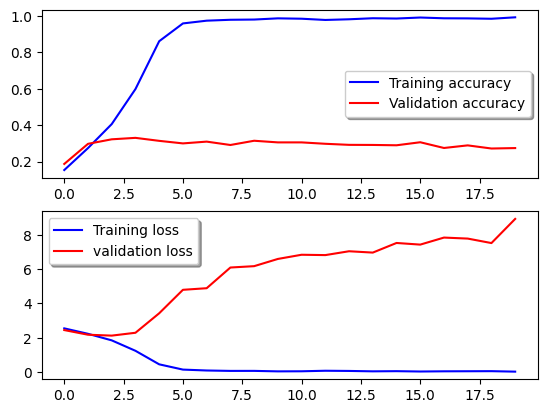

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [8]:
model.evaluate(test_generator)
model.save("models/CNN.h5")

189/189 [==============================] - 35s 186ms/step - loss: 8.9201 - accuracy: 0.2741


## Applying MobileNet Algorithm

In [9]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(15, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [10]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)

Epoch 1/20


C:\Users\ymts0427\AppData\Local\Temp\ipykernel_6444\4244930103.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)


441/441 [==============================] - 868s 2s/step - loss: 1.5634 - accuracy: 0.5126 - val_loss: 1.6212 - val_accuracy: 0.5262
Epoch 2/20
441/441 [==============================] - 837s 2s/step - loss: 1.0716 - accuracy: 0.6686 - val_loss: 1.4310 - val_accuracy: 0.5825
Epoch 3/20
441/441 [==============================] - 889s 2s/step - loss: 0.8365 - accuracy: 0.7434 - val_loss: 1.5357 - val_accuracy: 0.5577
Epoch 4/20
441/441 [==============================] - 826s 2s/step - loss: 0.6773 - accuracy: 0.7906 - val_loss: 1.7216 - val_accuracy: 0.5429
Epoch 5/20
441/441 [==============================] - 808s 2s/step - loss: 0.5533 - accuracy: 0.8295 - val_loss: 1.7160 - val_accuracy: 0.5452
Epoch 6/20
441/441 [==============================] - 827s 2s/step - loss: 0.4268 - accuracy: 0.8629 - val_loss: 1.9392 - val_accuracy: 0.5519
Epoch 7/20
441/441 [==============================] - 808s 2s/step - loss: 0.3462 - accuracy: 0.8937 - val_loss: 1.8101 - val_accuracy: 0.5960
Epoch 8/20

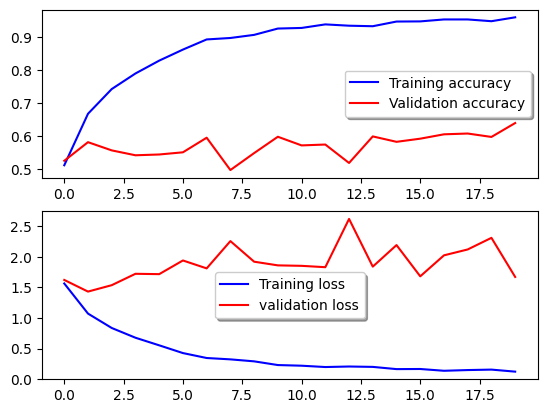

In [11]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model1.evaluate(test_generator)
model1.save("models/MobileNet.h5")

189/189 [==============================] - 61s 325ms/step - loss: 1.6699 - accuracy: 0.6405


## Clacate the Accurarcy

In [13]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9918367266654968, 0.9606575965881348]

## Classification Output

1/1 [==============================] - 1s 573ms/step
[0.720676   0.25540897 0.03093994 0.01401988 0.9999985  0.7321786
 0.04368554 0.8525536  0.16060776 0.56309384 0.21052413 0.8908219
 0.14593865 0.95212585 0.9264309 ]


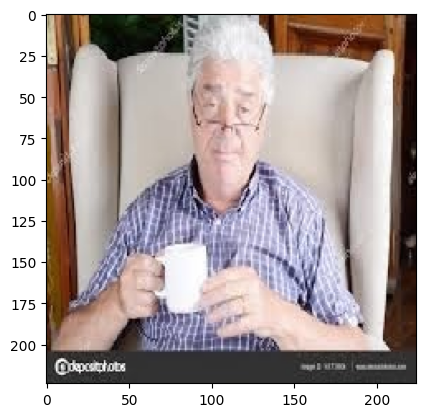

Prediction: drinking


In [14]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Data\drinking\Image_7.jpg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'Data\drinking\Image_7.jpg', grayscale=False, target_size=(224, 224))
Action = Action
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',Action[ind])